![image.png](attachment:6f43da7f-cc67-4cb3-a8ae-d04cd17a75e4.png)

# Index
![image.png](attachment:df00607c-2a35-4b89-b9c8-7a28e916a964.png)


## Problem Statement:
Predicting Customer Purchase Behavior for Bright Motor Company
## Business Context:
Bright Motor Company is looking to optimize its sales strategy by understanding the profiles of individuals likely to purchase their vehicles. They also want to price their products more effectively based on the customer’s profile and financial background.

The company has collected data from previous inquiries and purchases, which includes demographic, professional, and financial attributes of individuals who interacted with their dealership. This information will be used to analyze customer behavior, predict the likelihood of a purchase, and estimate the optimal product pricing strategy.
## Project Objective:
Your objective is to help Bright Motor Company with the following:

1. Exploratory Data Analysis (EDA):
* Understand the structure of the data.
* Identify trends and relationships between customer characteristics and purchase behavior.
* Find potential data quality issues (missing values, outliers, etc.)
* Visualize how salary, profession, education, and other factors relate to car buying behavior.

2. Classification Task (Binary Classification):
* Problem: Predict whether a customer will purchase a car or not (you may use the Make or create a derived binary target like Will_Purchase = 1 if Make is not null).
* Goal: Build and evaluate classification models (e.g., Logistic Regression, Decision Trees, Random Forest, etc.) to predict customer purchase decisions based on demographic and financial features.

3. Regression Task (Predictive Modeling):
* Problem: Predict the Price of the car purchased by the customer based on their demographic and financial profile.
* Goal: Build regression models (e.g., Linear Regression, Decision Tree Regressor, etc.) to estimate the appropriate price point for a customer.

4. Model Evaluation:
* Use appropriate metrics like:
* Classification: Accuracy, Precision, Recall, F1-Score, ROC-AUC
* Regression: RMSE, MAE, R²
* Perform cross-validation and hyperparameter tuning where applicable.

5. Model Deployment (Optional if time permits):
* Deploy the classification and regression models using Flask/Streamlit to demonstrate how Bright Motor Company can use this model in real-time.
* Create a basic UI where the company can input customer data and receive purchase predictions and recommended price.

#### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the dataset

In [2]:
df = pd.read_csv('/content/2-foodhub_order_New.csv')

## 1- Basic Exploration of data
* 1.1 Checking the top 5 rows
* 1.2 Checking the shape of dataset
* 1.3 Checking the info of dataset
* 1.4 Checking the Statistical summary

#### 1.1 Checking the top 5 rows

In [3]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


###### Observations:
1. There are some values in Gender which are required to be corrected.
2. In the feature No_of_Dependents we are having wrong entries like "?".
3.

#### 1.2 Checking the shape (no.of rows and columns in dataset)

In [4]:
df.shape

(1898, 9)

###### Result:
There are _ rows and _ columns in dataset

#### 1.3 Checking the info of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1895 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1896 non-null   float64
 8   delivery_time          1898 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


###### Observations:
1.

In [6]:
# Fetching data for age above 60
df[df['cost_of_the_order']>60]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
214,1476598,41168,Parm,Italian,121920.0,Weekend,3,34.0,22


#### 1.4 Statistical summary

In [7]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time
count,1.898000e+03,1898.000000,1898.000000,1896.000000
mean,1.477496e+06,171168.478398,80.722007,27.371835
std,5.480497e+02,113698.139743,2798.141333,4.634211
min,1.476547e+06,1311.000000,0.000000,20.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000
50%,1.477496e+06,128600.000000,14.160000,27.000000
75%,1.477970e+06,270525.000000,22.310000,31.000000
max,1.478444e+06,405334.000000,121920.000000,35.000000


###### Observations:
* 1- Partners of few customers may be home maker and not doing jobs.
* 2- We need to check the record where age is 120.
* 3- We need to check the record where age is 14.

## 2-Exploratory Data Analysis (EDA)
* 2.1 Checking the duplicate rows and fetching them
* 2.2 Checking Null Values (columnwise, percentage wise in columns and row-wise)
* 2.3 Outliers Analysis
* 2.4 Univariate Analysis
* 2.5 Bivariate Analysis

#### 2.1 Checking the duplicate rows

In [8]:
# total number of duplicate rows
df.duplicated().sum()

np.int64(0)

In [9]:
# Fetching duplicate rows
df[df.duplicated()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


###### Results:
1.

### 2.2 Checking Null Values

In [10]:
# Column-wise null values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,3
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,2
delivery_time,0


In [11]:
# Percentage wise null values in columns
df.isnull().sum()/len(df)*100

,0
order_id,0.000000
customer_id,0.000000
restaurant_name,0.000000
cuisine_type,0.158061
cost_of_the_order,0.000000
day_of_the_week,0.000000
rating,0.000000
food_preparation_time,0.105374
delivery_time,0.000000


In [12]:
# row-wise null values
df.isnull().sum(axis=1).sort_values(ascending=False)

,0
11,1
140,1
95,1
188,1
51,1
...,...
628,0
627,0
626,0
625,0


###### Results:


### 2.3 Outliers Analysis
* 2.3.1 Visualizing outliers
* 2.3.2 Finding the no. of outliers in each column

In [13]:
# Fetching the datasets having categorical & Numerical variables seperately
cat_variables= df.select_dtypes('object')
num_variables= df.select_dtypes(['int','float'])

In [14]:
cat_variables.head()

,restaurant_name,cuisine_type,day_of_the_week,rating,delivery_time
0,Hangawi,Korean,Weekend,Not given,20
1,Blue Ribbon Sushi Izakaya,Japanese,Weekend,Not given,?
2,Cafe Habana,Mexican,Weekday,5,28
3,Blue Ribbon Fried Chicken,American,Weekend,3,15
4,Dirty Bird to Go,American,Weekday,4,24


In [15]:
num_variables.head()

,order_id,customer_id,cost_of_the_order,food_preparation_time
0,1477147,337525,30.75,25.0
1,1477685,358141,12.08,25.0
2,1477070,66393,12.23,23.0
3,1477334,106968,29.20,25.0
4,1478249,76942,11.59,25.0


##### 2.3.1 Visualizing outliers

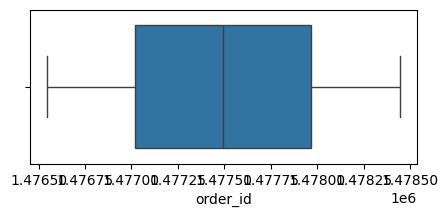

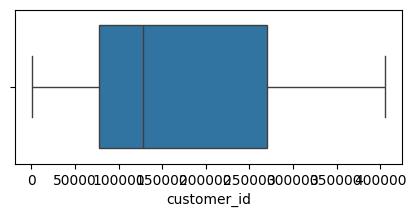

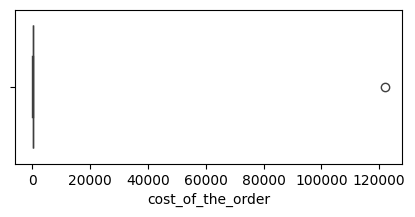

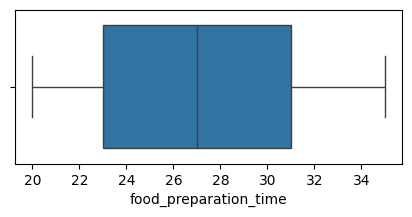

In [16]:
for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df, x=i)


###### Observations:
1.
2.

##### 2.3.2 Finding the no. of outliers in each column

In [17]:
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print("Number of ouliers in ",i,":", len(df[df[i]>upper_limit]))
    print('-----------------------')

Number of ouliers in  order_id : 0
-----------------------
Number of ouliers in  customer_id : 0
-----------------------
Number of ouliers in  cost_of_the_order : 1
-----------------------
Number of ouliers in  food_preparation_time : 0
-----------------------


###### Results:
1.
2.

### 2.4 Univariate Analysis

##### 2.4.1. Categorical variables vizual analysis:

In [18]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


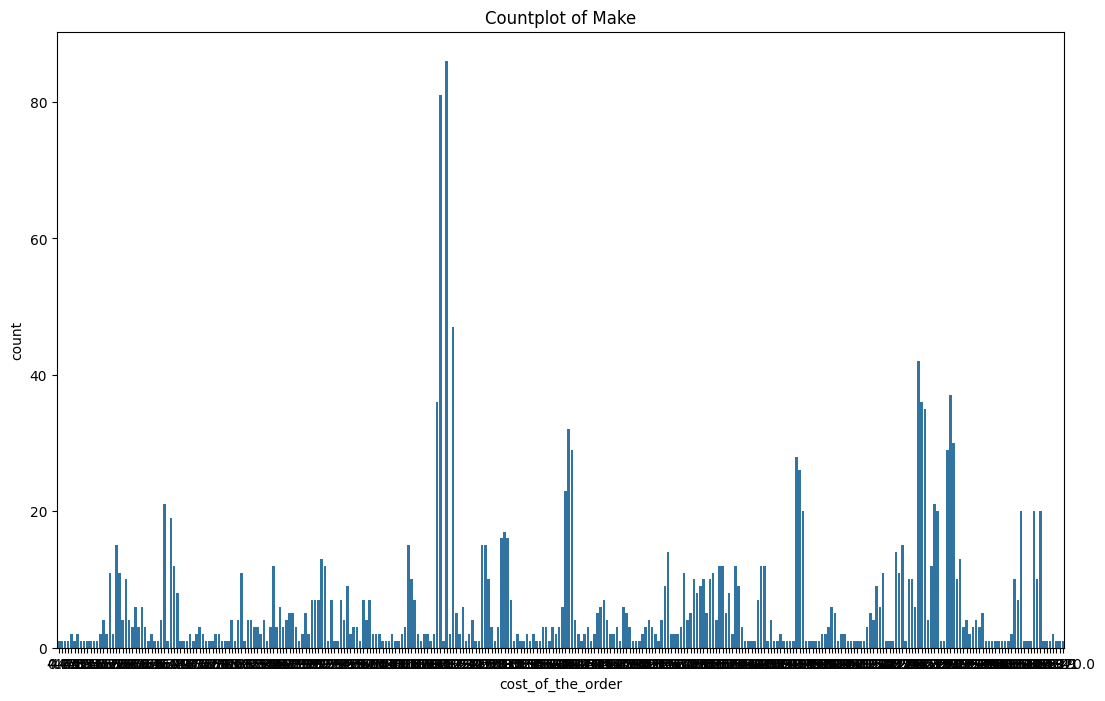

In [19]:
plt.figure(figsize=(13,8))
sns.countplot(data=df, x='cost_of_the_order')
plt.title('Countplot of Make');

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


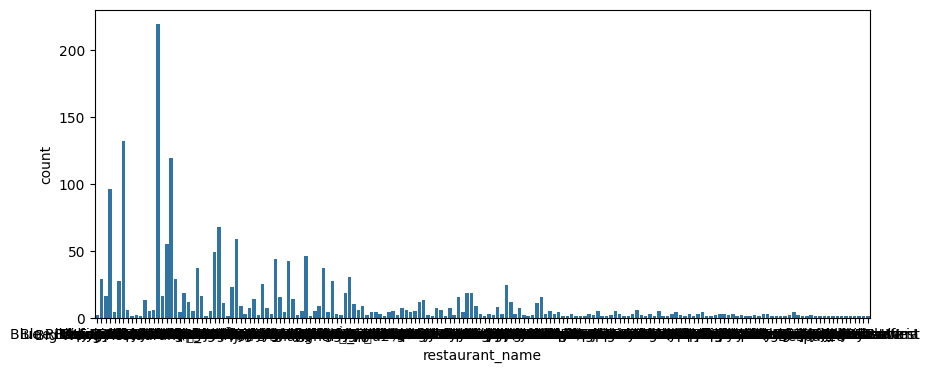

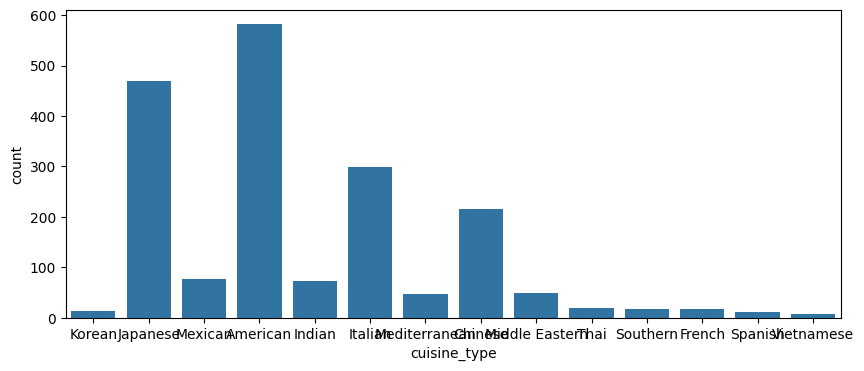

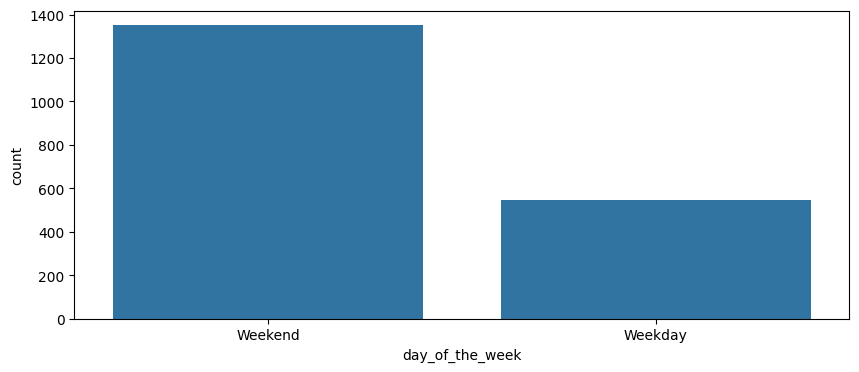

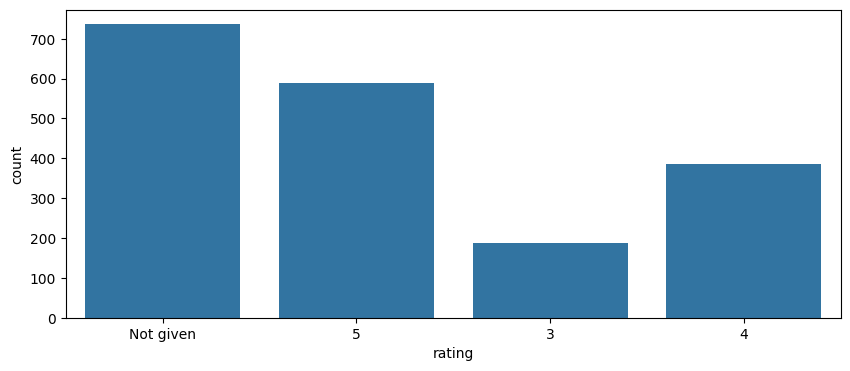

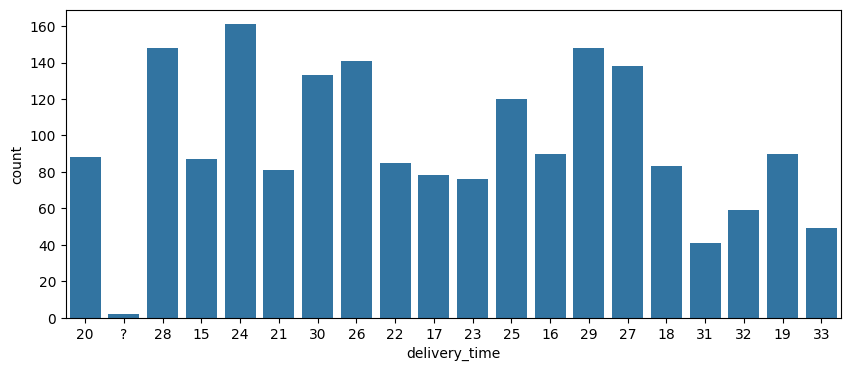

In [20]:
for i in cat_variables.columns:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=i)
    plt.show()

##### 2.4.2. Categorical variables numerical analysis:

In [21]:
for i in cat_variables.columns:
    print(df[i].nunique())
    print(df[i].value_counts())
    print('-------------')

178
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Rye House                      1
Hiroko's Place                 1
Frank Restaurant               1
Sarabeth's West                1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
-------------
14
cuisine_type
American          582
Japanese          470
Italian           298
Chinese           215
Mexican            76
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
-------------
2
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
-------------
4
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
-------

###### Observations:
1.
2.

##### 2.4.3. Numerical variables analysis:

###### Observations:
1.

### 2.5 Bi-variate analysis
* Since during model building we will be having "Price" and "Make" as our target variables so we will only do bi-variate analysis of these features only.

####  2.5.1. Relationship of  'Price' with Categorical features
* Few plots which we can use are:
    * Boxplot
    * Scatterplot
    * Barplot
    * Pointplot

##### 2.5.1.1. Numerical analysis:

In [22]:
for i in cat_variables.columns:
    print(i)
    print(df.groupby(i)['cost_of_the_order'].mean())
    print('--------------------')

restaurant_name
restaurant_name
'wichcraft           8.100000
12 Chairs           22.142500
5 Napkin Burger     15.968000
67 Burger           29.050000
Alidoro             12.610000
                      ...    
Zero Otto Nove       9.025000
brgr                 9.895000
da Umberto          17.620000
ilili Restaurant    19.067778
indikitch           12.792500
Name: cost_of_the_order, Length: 178, dtype: float64
--------------------
cuisine_type
cuisine_type
American           16.276082
Chinese            16.305209
French             19.793889
Indian             16.919726
Italian           425.505503
Japanese           16.304532
Korean             14.001538
Mediterranean      15.474783
Mexican            17.049342
Middle Eastern     18.820612
Southern           19.300588
Spanish            18.994167
Thai               19.207895
Vietnamese         12.882857
Name: cost_of_the_order, dtype: float64
--------------------
day_of_the_week
day_of_the_week
Weekday     16.311188
Weekend    106.80

##### 2.5.1.2. Visual analysis:

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


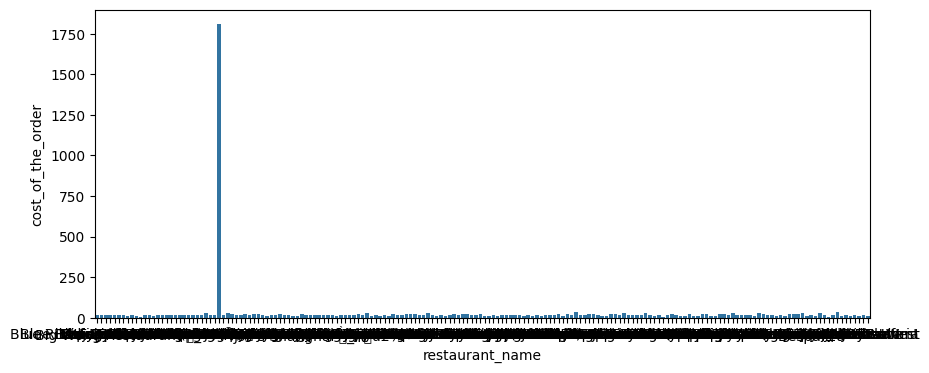

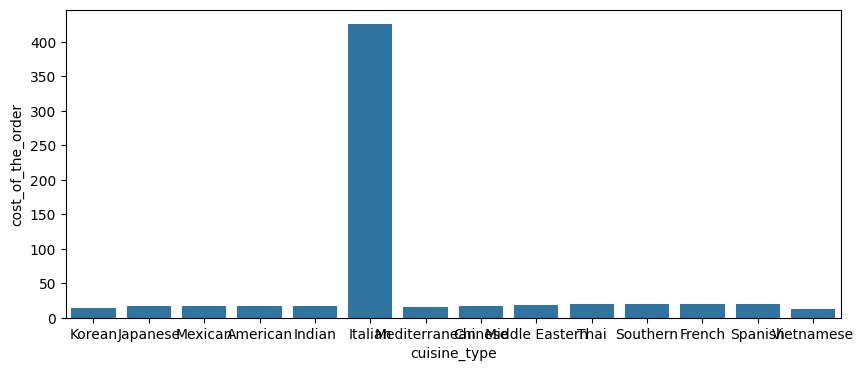

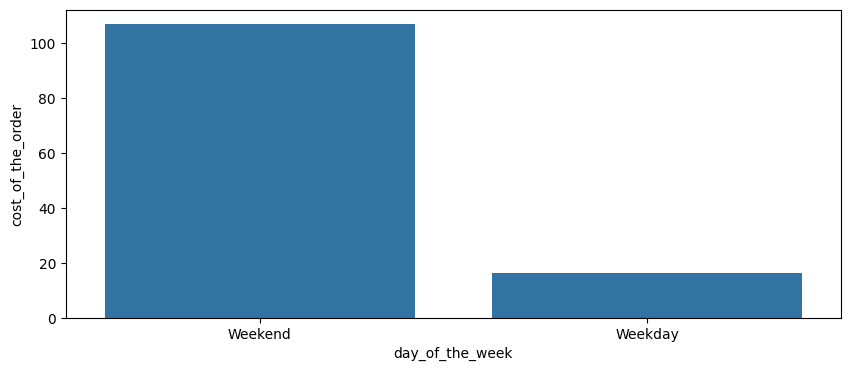

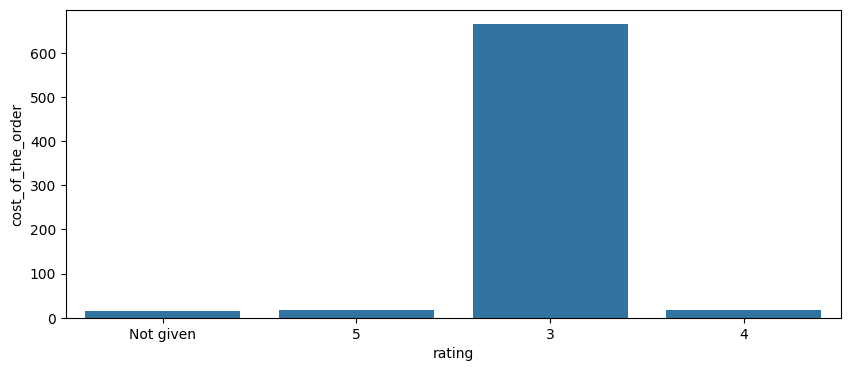

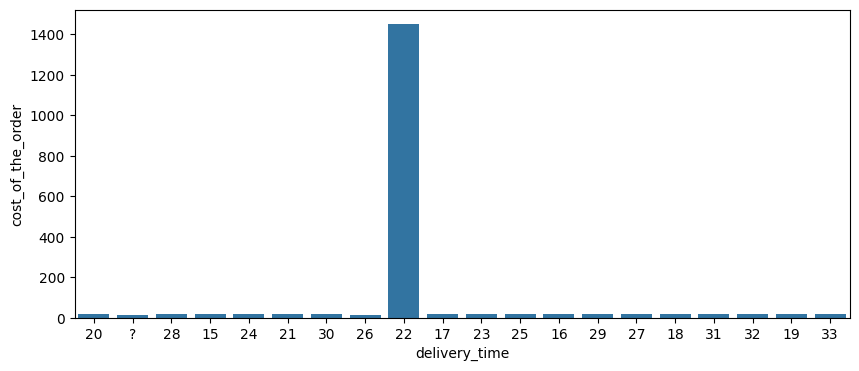

In [23]:
# barplots for Price vs all other categorical variables
for i in cat_variables.columns:
    plt.figure(figsize=(10,4))
    sns.barplot(data=df, y='cost_of_the_order',x=i,errorbar=None);

###### Observation:
1- Price vs Gender- Avg price of cars is hifh for females as compared to males
2-

####  2.5.2. Relationship of  'Price' with other numerical features
* Few plots which we can use are:
  * Pairplot
  * Jointplot
  * scatterplot

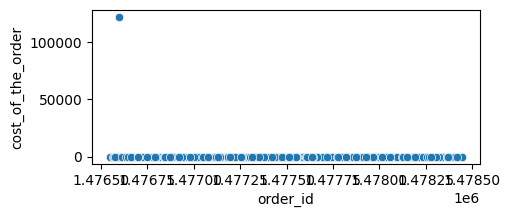

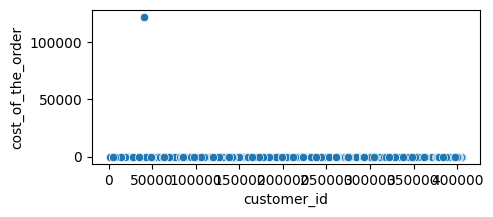

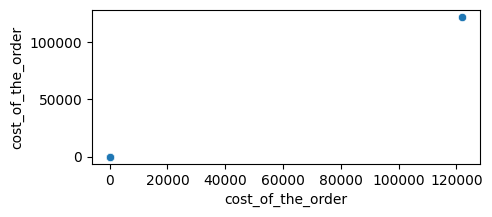

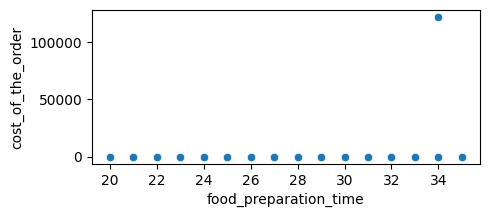

In [24]:
for i in num_variables.columns:
    plt.figure(figsize=(5,2))
    sns.scatterplot(data=df, y='cost_of_the_order',x=i);

##### Observations:
We cannot observe any pattern in the scatterplots which shows that there might be no correlation between price and any other numerical feature

##### Checking the correlation with heatmap to check above observation

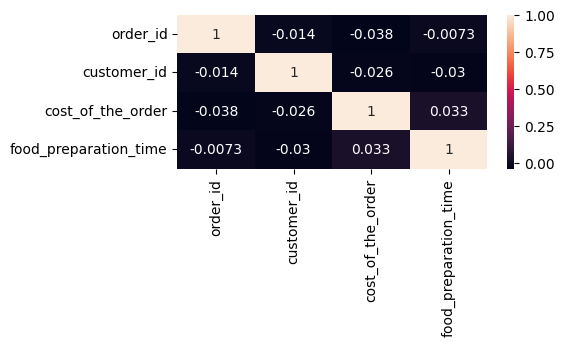

In [25]:
corr= num_variables.corr()
plt.figure(figsize=(5,2))
sns.heatmap(corr,annot=True);

##### Results:
1.

####  2.5.3 Relationship of  'Make' with all other features
* We can use following plots & tables :
    * Countplot with hue
    * crosstab
    * df.plot.bar(stacked=True)

##### 2.5.3.1 Visual analysis of "Make" with other categorical variables
    

In [26]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


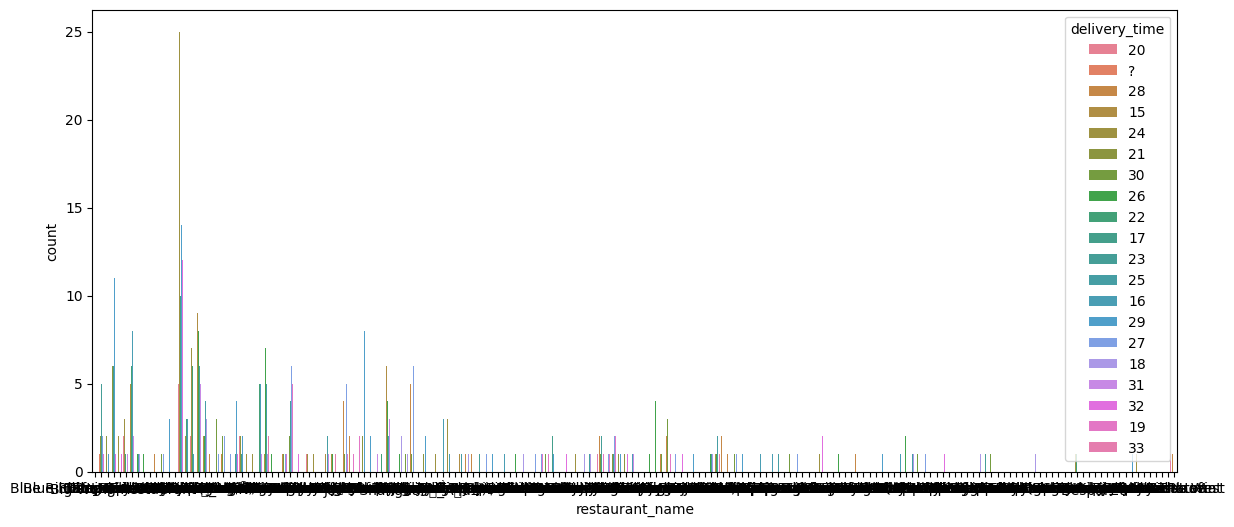

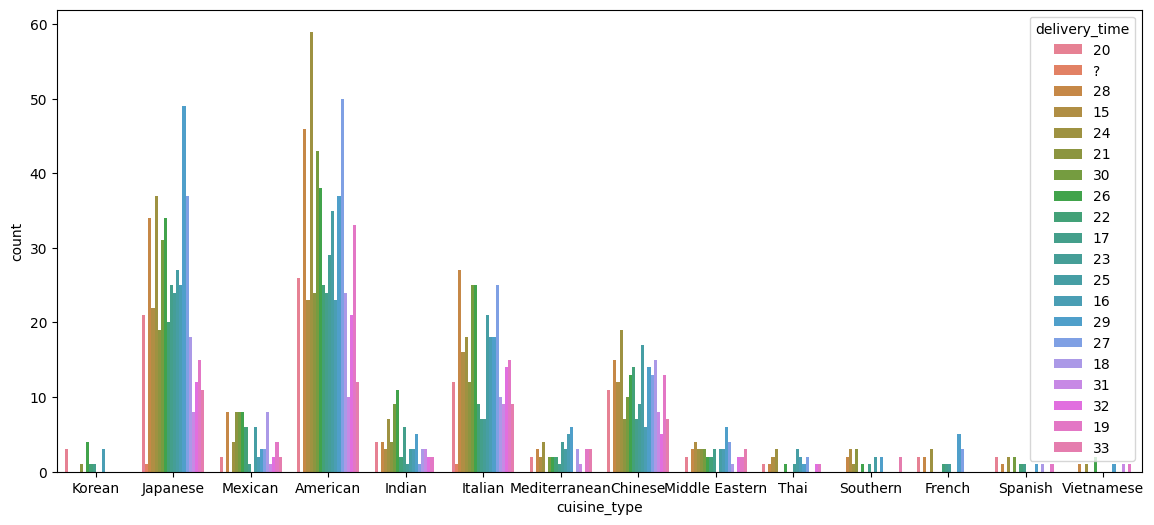

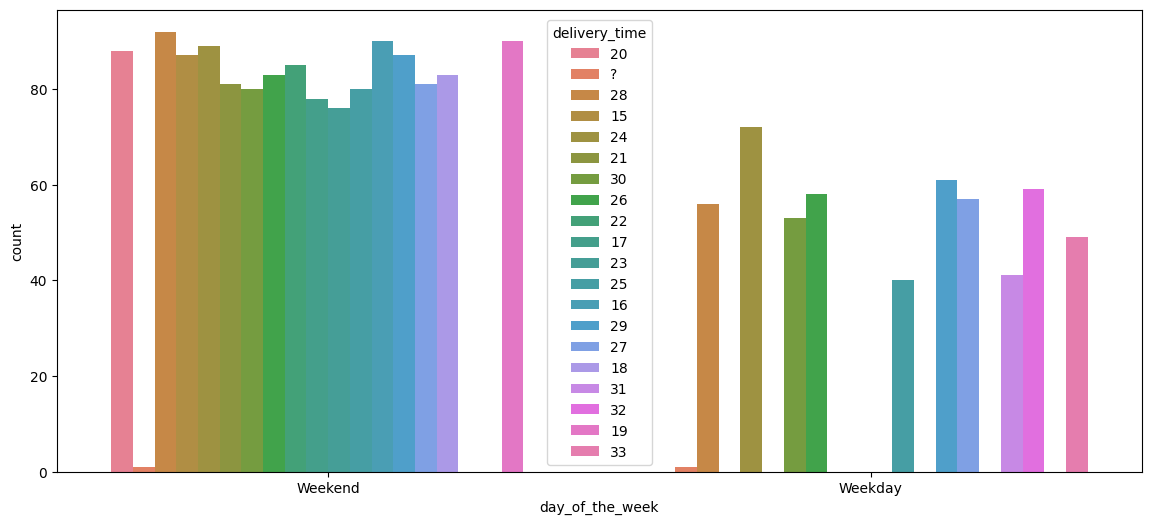

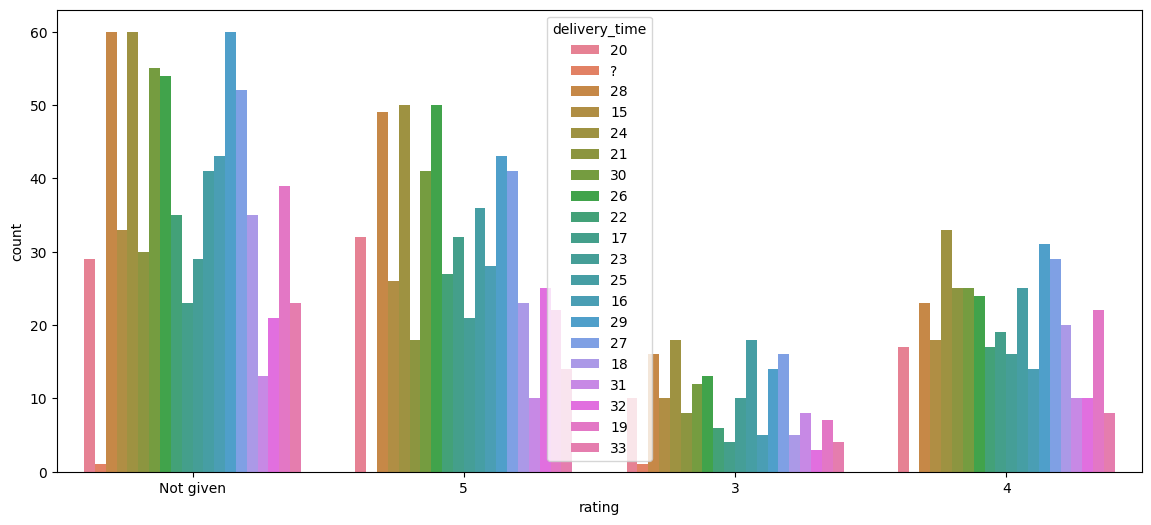

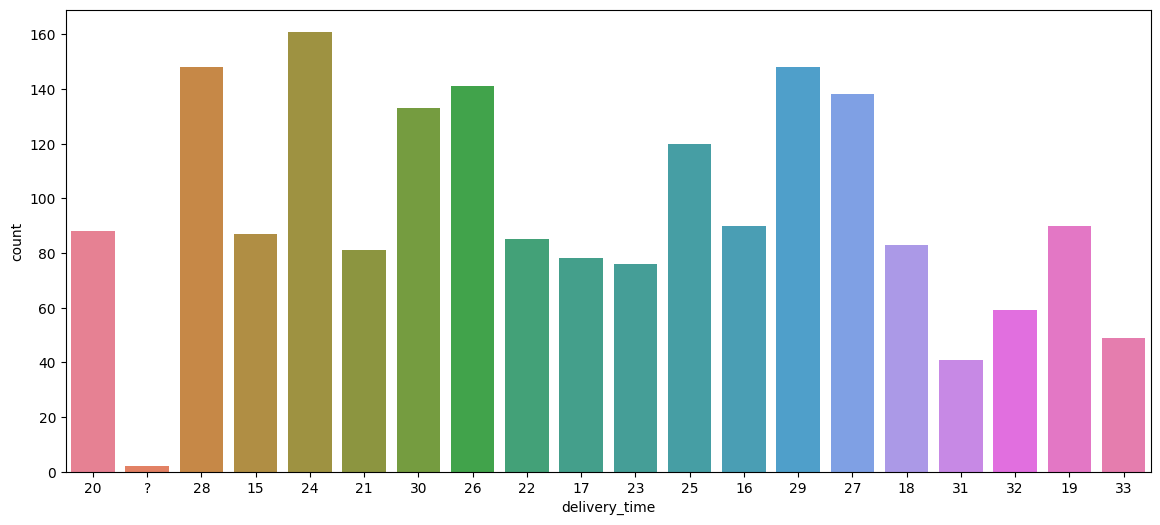

In [27]:
for i in cat_variables.columns:
    plt.figure(figsize=(14,6))
    sns.countplot(data=df, x=i, hue='delivery_time');

###### Observations;
1.

##### 2.5.3.2 Numerical analysis of "Make" with other categorical variables

In [28]:
for i in cat_variables:
    print(pd.crosstab(df['delivery_time'],df[i]))
    print('------------------------------')

restaurant_name  'wichcraft  12 Chairs  5 Napkin Burger  67 Burger  Alidoro  \
delivery_time                                                                 
15                        0          0                0          0        0   
16                        0          0                0          0        0   
17                        0          0                0          0        0   
18                        0          0                0          0        0   
19                        0          0                0          0        0   
20                        0          0                0          0        0   
21                        0          0                2          0        0   
22                        0          0                0          0        1   
23                        0          0                0          0        0   
24                        0          0                1          0        0   
25                        0          0              

###### Observations:

##### 2.5.3.3 Visual analysis of "Make" with other numerical variables
Use any of these plots
* 1.Boxplot
* 2.Scatterplot
* 3.Barplot
* 4.Pointplot

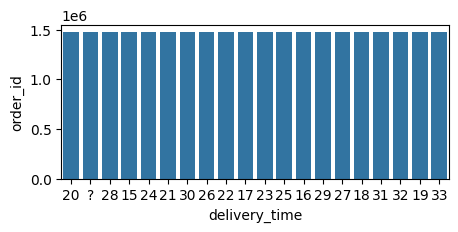

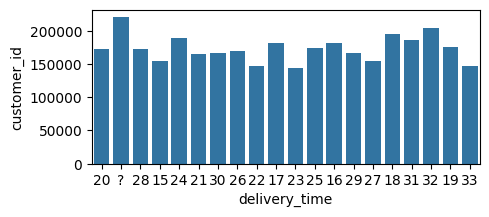

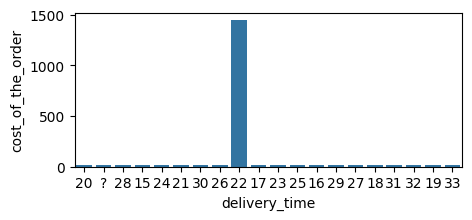

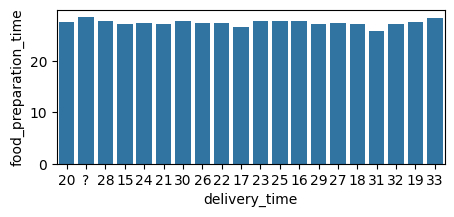

In [29]:
for i in num_variables.columns:
    plt.figure(figsize=(5,2))
    sns.barplot(data=df, x='delivery_time', y=i,errorbar= None);

###### Observations

##### 2.5.3.4 Numerical analysis of "Make" with other numerical variables

In [30]:
for i in num_variables.columns:
    print(i)
    print(df.groupby('delivery_time')[i].mean())
    print('--------------------')

order_id
delivery_time
15    1.477499e+06
16    1.477533e+06
17    1.477341e+06
18    1.477418e+06
19    1.477592e+06
20    1.477521e+06
21    1.477600e+06
22    1.477443e+06
23    1.477443e+06
24    1.477529e+06
25    1.477498e+06
26    1.477492e+06
27    1.477507e+06
28    1.477439e+06
29    1.477497e+06
30    1.477477e+06
31    1.477480e+06
32    1.477672e+06
33    1.477466e+06
?     1.477246e+06
Name: order_id, dtype: float64
--------------------
customer_id
delivery_time
15    155269.563218
16    181521.166667
17    181897.384615
18    196008.542169
19    175396.488889
20    172409.545455
21    164931.061728
22    147951.788235
23    144996.500000
24    189407.894410
25    174212.666667
26    169543.340426
27    155073.391304
28    173346.648649
29    166938.966216
30    167177.052632
31    186537.780488
32    204574.644068
33    146926.346939
?     221420.500000
Name: customer_id, dtype: float64
--------------------
cost_of_the_order
delivery_time
15      17.376782
16      17.273

##### Observations:
1.

# 3- Data Cleaning & pre processing
* 0.Dropping unwanted columns
* 1.Dropping duplicate rows
* 2.Replacing wrong entries
* 3.Missing values imputation (SimpleImputer, fillna())
* 4.Handle outliers (IQR, Z-score method)
* 5.Encoding
* 6.Data splitting
* 7.Feature scaling: StandardScaler, MinMaxScaler
* 8.Feature selection:Based on correlation, domain knowledge, or model-based methods


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/2-foodhub_order_New.csv')

In [32]:
df_copy= df.copy()
cat_variables= df_copy.select_dtypes('object')
num_variables= df_copy.select_dtypes(['int','float'])

#### 3.0 Dropping Unwanted columns

* We don't have any unwanted column in our dataset

#### 3.1 Dropping duplicates

In [33]:
print(" No. of rows before dropping duplicates :", df_copy.shape[0])
df_copy.drop_duplicates(inplace=True)
print(" No. of rows after dropping duplicates :", df_copy.shape[0])

 No. of rows before dropping duplicates : 1898
 No. of rows after dropping duplicates : 1898


#### 3.2 Replacing wrong entries

##### 3.2.1 Gender

In [34]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


In [35]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['delivery_time'].unique())
print("Number of Unique categories in feature : ",df_copy['delivery_time'].nunique())
print("Count of Unique categories in feature : ",df_copy['delivery_time'].value_counts())

Unique categories in feature :  ['20' '?' '28' '15' '24' '21' '30' '26' '22' '17' '23' '25' '16' '29' '27'
 '18' '31' '32' '19' '33']
Number of Unique categories in feature :  20
Count of Unique categories in feature :  delivery_time
24    161
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     76
32     59
33     49
31     41
?       2
Name: count, dtype: int64


In [36]:
# Fetching the records where Make is "?"
df_copy[df_copy['delivery_time']=='?']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
180,1476808,84700,Pepe Giallo,Italian,14.60,Weekday,3,32.0,?


In [37]:
df_copy['delivery_time']=df_copy['delivery_time'].replace('?',df_copy['delivery_time'].mode()[0])

In [38]:
# After Cleaning
print("Unique categories in feature : ",df_copy['delivery_time'].unique())
print("Number of Unique categories in feature : ",df_copy['delivery_time'].nunique())
print("Count of Unique categories in feature : ",df_copy['delivery_time'].value_counts())

Unique categories in feature :  ['20' '24' '28' '15' '21' '30' '26' '22' '17' '23' '25' '16' '29' '27'
 '18' '31' '32' '19' '33']
Number of Unique categories in feature :  19
Count of Unique categories in feature :  delivery_time
24    163
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     76
32     59
33     49
31     41
Name: count, dtype: int64


##### 3.2.2 Make

In [39]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['rating'].unique())
print("Number of Unique categories in feature : ",df_copy['rating'].nunique())
print("Count of Unique categories in feature : ",df_copy['rating'].value_counts())

Unique categories in feature :  ['Not given' '5' '3' '4']
Number of Unique categories in feature :  4
Count of Unique categories in feature :  rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


In [40]:
# Fetching the rows with wrong entries
df_copy[df_copy['rating']=='Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28.0,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34.0,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23.0,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26.0,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22.0,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29.0,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31.0,24


In [41]:
# Replacing with 0
df_copy['rating']=df_copy['rating'].replace('Not given','0')
df_copy['rating']=df_copy['rating'].astype('int')

In [42]:
# After Cleaning
print("Unique categories in feature : ",df_copy['rating'].unique())
print("Number of Unique categories in feature : ",df_copy['rating'].nunique())
print("Count of Unique categories in feature : ",df_copy['rating'].value_counts())

Unique categories in feature :  [0 5 3 4]
Number of Unique categories in feature :  4
Count of Unique categories in feature :  rating
0    736
5    588
4    386
3    188
Name: count, dtype: int64


###### How to replace two same wrong entries with two seperate values

In [43]:
df_copy['rating'].value_counts()

,count
rating,
0,736
5,588
4,386
3,188


In [44]:
df_copy[df_copy['rating']=='?']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


##### 3.2.3 Replacing wrong entries in No_of_Dependents

###### Note- We cannot replace wrong entries with mean above as the No_of_Dependents should be a whole number and it can't be a decimal value.

#### 3.3 Missing values Treatment

| Acronym  | Full Form                    | Meaning                                                                        | Bias Introduced | Example                                                                        |
| -------- | ---------------------------- | ------------------------------------------------------------------------------ | --------------- | ------------------------------------------------------------------------------ |
| **MCAR** | Missing Completely At Random | The missingness has **no relation** to any data, observed or missing.          | ❌ No            | A sensor randomly fails and misses temperature readings.                       |
| **MAR**  | Missing At Random            | The missingness is **related to observed data**, not the missing value itself. | ✅ Yes (mild)    | People with higher incomes are less likely to report income, but age is known. |
| **MNAR** | Missing Not At Random        | The missingness is related to the **missing value itself**.                    | ✅ High          | People with very low income tend to skip the income question.                  |


##### Example
| Name  | Age | Income |
| ----- | --- | ------ |
| Alice | 25  | 50k    |
| Bob   | 30  | NaN    |
| Carol | NaN | 70k    |
| David | 40  | NaN    |


* MCAR: Missing income for Bob and David is due to random system error.
* MAR: Missing income depends on age (older people don't report income), but income itself doesn't influence missingness.
* MNAR: Income is missing because it's very high or very low, and people choose not to report it.

| Type | Can You Impute?                           | Need Advanced Methods?                         |
| ---- | ----------------------------------------- | ---------------------------------------------- |
| MCAR | ✅ Yes (Mean/Median Imputation)            | ❌ No                                           |
| MAR  | ✅ Yes (Advanced Imputers: KNN, Iterative) | ⚠️ Maybe                                       |
| MNAR | ❌ Not reliably                            | ✅ Yes (Model-based or domain knowledge needed) |


# Null values Treatment general guideline:
* Check the datatype of feature:
  * If datatype== Categorical ; replace null values with mode
  * If datatype== Numerical:
    * Check for outliers:
      * If outliers are present; replace null values with median
      * If outliers are NOT present; replace null values with mean

In [45]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,3
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,2
delivery_time,0


##### Filling null values using fillna- Gender, Salary

In [46]:
df_copy['cuisine_type'].mode()[0]

'American'

In [47]:
df_copy['cuisine_type'] = df_copy['cuisine_type'].fillna(df_copy['cuisine_type'].mode()[0])

In [48]:
df_copy.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,2
delivery_time,0


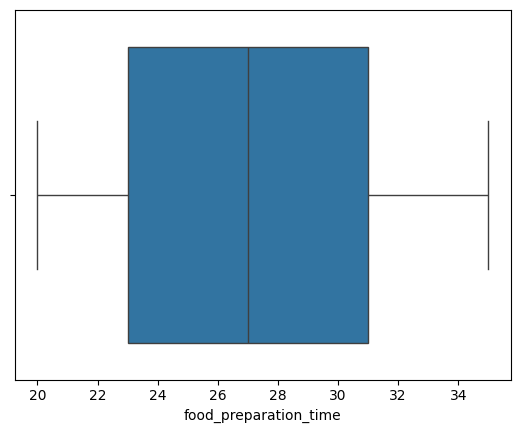

In [49]:
sns.boxplot(data=df_copy, x='food_preparation_time');

In [50]:
df_copy['food_preparation_time'] = df_copy['food_preparation_time'].fillna(df_copy['food_preparation_time'].mean())

In [51]:
df_copy.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Filling null values using simple imputer- Profession,Partner_salary

In [52]:
df_copy.to_csv('df_cleaned.csv', index=False)

##### Other popular methods

| Method                                 | Description                                              |
| -------------------------------------- | -------------------------------------------------------- |
| `ffill()` / `bfill()`                  | Forward or backward fill values                          |
| Mode/Median Imputation                 | Use most frequent / median value                         |
| KNN Imputer (`KNNImputer`)             | Predict null values using nearest neighbors              |
| Iterative Imputer (`IterativeImputer`) | Uses regression models to predict missing values         |
| Drop missing (`dropna`)                | Drop rows/columns with missing values (when appropriate) |
| Domain-specific value                  | E.g., fill age with 0 only if 0 means "unknown"          |


## 3.4 Outliers Treatment

#### 1. Popular Methods for Outlier Detection & Treatment

| Method                           | Type         | Handles   | Robustness  | When to Use                   |
| -------------------------------- | ------------ | --------- | ----------- | ----------------------------- |
| **IQR (Interquartile Range)**    | Univariate   | Numerical | ✅ Robust    | Simple, small-medium datasets |
| **Z-Score**                      | Univariate   | Numerical | ❌ Sensitive | Normal-like distributions     |
| **Percentile Capping**           | Univariate   | Numerical | ✅ Robust    | Quick wins, business rules    |
| **Isolation Forest**             | Multivariate | Numerical | ✅ Good      | Large, high-dimensional data  |
| **DBSCAN (Clustering)**          | Multivariate | All       | ✅ Moderate  | Cluster-shaped datasets       |
| **Boxplots / Visual Inspection** | Univariate   | Numerical | Manual      | For EDA or small data         |
| **LOF (Local Outlier Factor)**   | Multivariate | All       | ✅ High      | Density-based outliers        |


In [53]:
df_copy2= pd.read_csv('df_cleaned.csv')

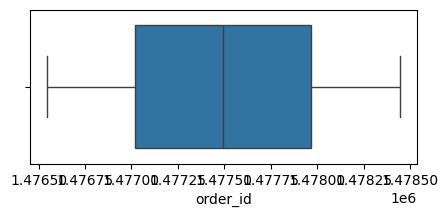

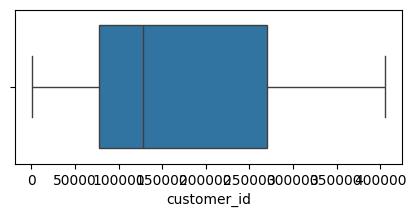

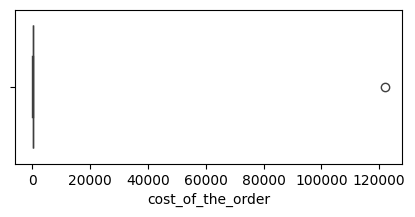

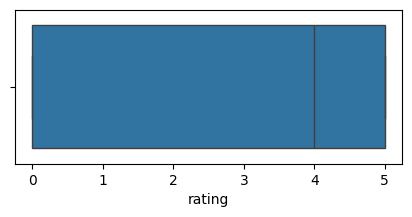

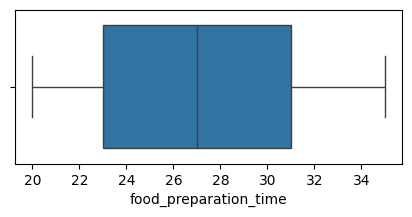

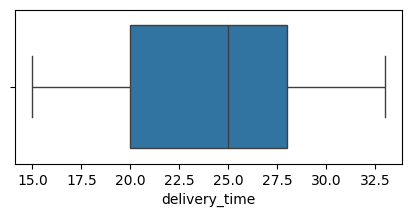

In [54]:
for i in df_copy2.select_dtypes(['int','float']).columns:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df_copy2,x=i);

In [55]:
# A.IQR Method (Interquartile Range)
Q1 = df_copy2['cost_of_the_order'].quantile(0.25)
Q3 = df_copy2['cost_of_the_order'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

(np.float64(-3.264999999999999), np.float64(37.655))

In [56]:
# Filter out outliers
df_copy2[(df_copy2['cost_of_the_order'] <= lower) | (df_copy2['cost_of_the_order'] >= upper)]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
214,1476598,41168,Parm,Italian,121920.0,Weekend,3,34.0,22


In [57]:
df_copy2['cost_of_the_order'].quantile(0.99)

np.float64(33.03)

In [58]:
df_copy2['cost_of_the_order'].describe()

,cost_of_the_order
count,1898.000000
mean,80.722007
std,2798.141333
min,0.000000
25%,12.080000
50%,14.160000
75%,22.310000
max,121920.000000


In [59]:
df_copy2['cost_of_the_order'] =np.where(df_copy2['cost_of_the_order']<= lower,df_copy2['cost_of_the_order'].median(),df_copy2['cost_of_the_order'])
df_copy2['cost_of_the_order'] =np.where(df_copy2['cost_of_the_order']>= upper,df_copy2['cost_of_the_order'].median(),df_copy2['cost_of_the_order'])

In [60]:
 df_copy2[(df_copy2['cost_of_the_order'] <= lower) | (df_copy2['cost_of_the_order'] >= upper)]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


##### Note - We lately found a datapoint where age is 14 and this is not getting detected during outliers treatment. So we need to treat 'Age" manually here.

In [61]:
df_copy2['cost_of_the_order'] =np.where(df_copy2['cost_of_the_order'] ==14,29,df_copy2['cost_of_the_order'])

In [62]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


In [63]:
df_copy2['cost_of_the_order'].describe()

,cost_of_the_order
count,1898.000000
mean,16.493430
std,7.492298
min,0.000000
25%,12.080000
50%,14.160000
75%,22.297500
max,35.410000


In [64]:
df_copy2.to_csv('df_cleaned_and_treated.csv', index=False)


#### C.Percentile Capping (Winsorization)
from scipy.stats.mstats import winsorize

Winsorize at 5th and 95th percentile

df['capped_age'] = winsorize(df['Age'], limits=[0.05, 0.05])

#### D. Isolation Forest (Multivariate)
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1)

df['outlier'] = clf.fit_predict(df[['Age']])

df_filtered = df[df['outlier'] == 1]

print(df_filtered)

#### E.Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)

df['outlier'] = lof.fit_predict(df[['Age']])

df_filtered = df[df['outlier'] == 1]

print(df_filtered)

##### Comparison Summary
| Method           | Speed     | Interpretability | Works on Multivariate | Scikit-learn Support |
| ---------------- | --------- | ---------------- | --------------------- | -------------------- |
| IQR              | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No                 |
| Z-Score          | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No                 |
| Winsorization    | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No (in `scipy`)    |
| Isolation Forest | ⚠️ Slower | ✅ Moderate       | ✅ Yes                 | ✅ Yes                |
| LOF              | ⚠️ Slower | ⚠️ Hard          | ✅ Yes                 | ✅ Yes                |


## 3.5 Encoding

Encoding is the process of converting categorical variables (text labels or categories) into a numerical format, so they can be used in machine learning models (which require numerical input).

Types of Categorical Variables
* Nominal – No natural order. E.g., Gender, Color, Country
* Ordinal – Has a meaningful order. E.g., Size (Small < Medium < Large), Rating (Low < Medium < High)

In [65]:
df_3= pd.read_csv('df_cleaned_and_treated.csv')

In [66]:
cat_variables= df_3.select_dtypes('object')
num_variables= df_3.select_dtypes(['int','float'])


#### Note
* Nominal features with low cardinality ===>> Gender, Profession, Marital_status,Personal_loan,House_loan,Partner_working,Make
* Nominal features with high cardinality ===>> No feature
* Ordinal features ===>> Education

ValueError: y contains previously unseen labels: 'Hampton Chutney Co.'

In [67]:
# 2. Nominal encoding
nominal_features=['cuisine_type','day_of_the_week']
for i in nominal_features:
    print(i,";")
    print(pd.Categorical(cat_variables[i],ordered= False))
    print(pd.Categorical(cat_variables[i],ordered= False).codes)
    print('----------------------------------------')
    cat_variables[i]=pd.Categorical(cat_variables[i],ordered= False).codes

cuisine_type ;
['Korean', 'Japanese', 'Mexican', 'American', 'American', ..., 'Mexican', 'American', 'Japanese', 'Mediterranean', 'Japanese']
Length: 1898
Categories (14, object): ['American', 'Chinese', 'French', 'Indian', ..., 'Southern', 'Spanish', 'Thai',
                          'Vietnamese']
[6 5 8 ... 5 7 5]
----------------------------------------
day_of_the_week ;
['Weekend', 'Weekend', 'Weekday', 'Weekend', 'Weekday', ..., 'Weekend', 'Weekend', 'Weekday', 'Weekday', 'Weekend']
Length: 1898
Categories (2, object): ['Weekday', 'Weekend']
[1 1 0 ... 0 0 1]
----------------------------------------


In [68]:
cat_variables.head()

,restaurant_name,cuisine_type,day_of_the_week
0,Hangawi,6,1
1,Blue Ribbon Sushi Izakaya,5,1
2,Cafe Habana,8,0
3,Blue Ribbon Fried Chicken,0,1
4,Dirty Bird to Go,0,0


##### Common encoding techniques:
| Encoding Method      | Type of Data | Pros                  | Cons                             |
| -------------------- | ------------ | --------------------- | -------------------------------- |
| Label Encoding       | Ordinal      | Simple                | Imposes order on nominal data    |
| One-Hot Encoding     | Nominal      | No order imposed      | High dimensionality              |
| Ordinal Encoding     | Ordinal      | Preserves order       | You must define the order        |
| Frequency Encoding   | Nominal      | Simple, compact       | May mislead the model            |
| Target/Mean Encoding | Nominal      | Can boost performance | Risk of overfitting/data leakage |


In [69]:
df_encoded=pd.concat([num_variables,cat_variables], axis=1,)
df_encoded.head()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time,restaurant_name,cuisine_type,day_of_the_week
0,1477147,337525,30.75,0,25.0,20,Hangawi,6,1
1,1477685,358141,12.08,0,25.0,24,Blue Ribbon Sushi Izakaya,5,1
2,1477070,66393,12.23,5,23.0,28,Cafe Habana,8,0
3,1477334,106968,29.20,3,25.0,15,Blue Ribbon Fried Chicken,0,1
4,1478249,76942,11.59,4,25.0,24,Dirty Bird to Go,0,0


In [70]:
print(num_variables.columns)

Index(['order_id', 'customer_id', 'cost_of_the_order', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')


In [71]:
df_encoded.to_csv('df_encoded', index=False)

In [72]:
df_encoded.head()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time,restaurant_name,cuisine_type,day_of_the_week
0,1477147,337525,30.75,0,25.0,20,Hangawi,6,1
1,1477685,358141,12.08,0,25.0,24,Blue Ribbon Sushi Izakaya,5,1
2,1477070,66393,12.23,5,23.0,28,Cafe Habana,8,0
3,1477334,106968,29.20,3,25.0,15,Blue Ribbon Fried Chicken,0,1
4,1478249,76942,11.59,4,25.0,24,Dirty Bird to Go,0,0


#### Difference in `pd.Categorical` technique and Sklearn's `LabelEncoder` / `OrdinalEncoder`
| Feature                    | `pd.Categorical`      | `LabelEncoder` / `OrdinalEncoder` |
| -------------------------- | --------------------- | --------------------------------- |
| Built into Pandas          | ✅ Yes                 | ❌ No                              |
| Easy for quick exploration | ✅ Very                | ➖ Slightly more verbose           |
| Custom category ordering   | ✅ Yes                 | ✅ Yes                             |
| Part of sklearn pipelines  | ❌ Not natively        | ✅ Integrates well                 |
| Handles unknown values     | ❌ Fails or assigns -1 | ✅ Can handle with parameters      |


## 3.6 Train Test Split (Required when building model for predictions)
#### What is train_test_split?
train_test_split is a function from scikit-learn used to split your dataset into two parts:

Training set – to train the model

Validation set – to evaluate the model's performance

#### Why is it required?
When building machine learning models, we train the model on one portion of the data and test it on unseen data to check how well it generalizes.

This prevents overfitting and gives a fair estimate of model accuracy.

In [73]:
df_TrainTestSplit= pd.read_csv('df_encoded')

#### Separating Features and Target

In [74]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25.0,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,?
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23.0,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25.0,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25.0,24


In [75]:
X = df_TrainTestSplit.drop('cost_of_the_order', axis=1)
y = df_TrainTestSplit['cost_of_the_order']

#### Splitting the data in train and validation sets

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)

## 3.7 Scaling
* Why Feature Scaling is Important:

Many machine learning algorithms (like KNN, SVM, Gradient Descent-based models, Neural Networks) compute distances or rely on the magnitude of features. If one feature has a large range and another has a small range, the model might become biased toward the feature with the larger range.

##### Most common techniques:
![image.png](attachment:e545afc2-0cd6-44c5-a944-9699a82fbb30.png)
![image.png](attachment:78d23bc0-1915-42a6-b681-beae43ee6649.png)

##### Seperating numerical features for scaling

##### 1. Min-Max Scaling

In [77]:
cat_cols=['restaurant_name','cuisine_type','day_of_the_week']
num_cols= ['order_id','customer_id','cost_of_the_order','food_preparation_time','delivery_time']

In [78]:
print(df.columns.tolist())



['order_id', 'customer_id', 'restaurant_name', 'cuisine_type', 'cost_of_the_order', 'day_of_the_week', 'rating', 'food_preparation_time', 'delivery_time']


In [79]:
X = df.drop(columns=[])

In [80]:
X_train.columns = X_train.columns.str.strip()
X_val.columns = X_val.columns.str.strip()

In [81]:
from sklearn.model_selection import train_test_split

# Start from clean DataFrame
df.columns = df.columns.str.strip()  # Just to be safe

# Drop rows with missing/invalid 'food_preparation_time'
df = df[df['food_preparation_time'].notnull()]

# Optional: drop rows with delivery_time == '?'
df = df[df['delivery_time'] != '?']

# Convert delivery_time to float
df['delivery_time'] = df['delivery_time'].astype(float)

# Define features and label
X = df.drop(columns=['rating'])  # or any column you're trying to predict
y = df['rating']  # for example

# Now split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm presence of the column
print('food_preparation_time' in X_train.columns)  # ✅ Should now return True


True


In [82]:
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()
Xtrain_scaled_MinMax = MMscaler.fit_transform(X_train[num_cols])
Xval_scaled_MinMax = MMscaler.transform(X_val[num_cols])

In [83]:
Xtrain_scaled_MinMax=pd.DataFrame(Xtrain_scaled_MinMax,columns=X_train[num_cols].columns)
Xval_scaled_MinMax=pd.DataFrame(Xval_scaled_MinMax,columns=X_val[num_cols].columns)

In [84]:
# Manually checking MinMax
(36-X_val['food_preparation_time'].min())/(X_val['food_preparation_time'].max()-X_val['food_preparation_time'].min())

1.0666666666666667

In [85]:
Xtrain_scaled_MinMax.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000
mean,0.502903,0.418850,0.466328,0.498570,0.507261
std,0.288975,0.280806,0.212601,0.309600,0.275945
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252768,0.190042,0.341147,0.200000,0.277778
50%,0.502899,0.314657,0.398757,0.533333,0.555556
75%,0.750659,0.657575,0.630048,0.733333,0.722222
max,1.000000,1.000000,1.000000,1.000000,1.000000


##### Note- We can check that all the features are now scaled between 0 to 1 (min=0, max=1)

#### 2. z-score Scaling (standardization)

In [86]:
from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler()
Xtrain_scaled_StandardScalar = SSscaler.fit_transform(X_train[num_cols])
Xval_scaled_StandardScalar = SSscaler.transform(X_val[num_cols])

In [87]:
Xtrain_scaled_StandardScalar=pd.DataFrame(Xtrain_scaled_StandardScalar,columns=X_train[num_cols].columns)
Xval_scaled_StandardScalar=pd.DataFrame(Xval_scaled_StandardScalar,columns=X_val[num_cols].columns)

In [88]:
round(Xtrain_scaled_StandardScalar.describe(),2)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1515.00,1515.00,1515.00,1515.00,1515.00
mean,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.74,-1.49,-2.19,-1.61,-1.84
25%,-0.87,-0.82,-0.59,-0.96,-0.83
50%,-0.00,-0.37,-0.32,0.11,0.18
75%,0.86,0.85,0.77,0.76,0.78
max,1.72,2.07,2.51,1.62,1.79


In [89]:
# Manually checking z-scores
(45- X_train['food_preparation_time'].mean())/X_train['food_preparation_time'].std()

np.float64(3.772921674082787)

In [90]:
cat_cols = X_train.select_dtypes(include='object').columns.tolist()


In [91]:
scaled_train=pd.concat([Xtrain_scaled_StandardScalar,X_train[cat_cols].reset_index(drop=True)],axis=1)
scaled_test=pd.concat([Xval_scaled_StandardScalar,X_val[cat_cols].reset_index(drop=True)],axis=1)

In [92]:
scaled_train.to_csv('Scaled_data_train',index=False)
scaled_test.to_csv('Scaled_data_val',index=False)

In [111]:
from sklearn.preprocessing import LabelEncoder

# Example for DataFrame
for col in scaled_train.columns:
    if scaled_train[col].dtype == 'object':
        le = LabelEncoder()
        scaled_train[col] = le.fit_transform(scaled_train[col])
        scaled_val[col] = le.transform(scaled_val[col])

In [112]:
if y_train.dtype == 'object':
    le_target = LabelEncoder()
    y_train = le_target.fit_transform(y_train)
    y_val = le_target.transform(y_val)


#### Summary Table of most popular methods;
| Method          | Range    | Affected by Outliers | Use Case                            |
| --------------- | -------- | -------------------- | ----------------------------------- |
| Min-Max Scaling | \[0, 1]  | ✅ Yes                | Image data, bounded values          |
| Standardization | \~N(0,1) | ❌ Less               | Linear models, SVM, Neural Networks |
| Robust Scaling  | Depends  | ❌ No                 | Data with outliers                  |
| MaxAbs Scaling  | \[-1, 1] | ❌ Less               | Sparse data (e.g., NLP features)    |


# 4-Model Building (Regression), Evaluation & Tuning

### 4.1 Regression algorithms
    * Linear Regression
    * KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting
        * Adaboost,
        * Gboost,
        * XGboost
### 4.2 Model Evaluation: Regression metrics: R² & RMSE
1. R-squared (R²) — Coefficient of Determination
    * What it means:
        * Measures how well the model explains the variability in the target variable.
        * Value lies between 0 and 1 (can be negative if model performs worse than the mean).
    * Interpretation:
        * R² = 1 → perfect prediction
        * R² = 0 → model is no better than the average
        * Higher is better
          ![image.png](attachment:e23679fd-3fe1-4ef2-b9e9-1dfed173e585.png)

2. RMSE — Root Mean Squared Error
    * What it means:
        * Measures average prediction error in the same units as the target variable.
        * It gives more weight to larger errors.
    * Interpretation:
        * Lower is better
        * Easy to interpret because it’s in the same unit as
          ![image.png](attachment:65110f95-03fd-4549-be04-631970e6b345.png)
### 4.3 Model Tuning
    * GridSearchCV
    * Hyper Parameter Tuning


In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
#pip install xgboost
from xgboost import XGBRegressor

In [114]:
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

In [115]:
# Loading the encoded data
df_TrainTestSplit = pd.read_csv('df_encoded')
df_TrainTestSplit.columns = df_TrainTestSplit.columns.str.strip()

# Separate target from features
X = df_TrainTestSplit.drop('food_preparation_time', axis=1)
y = df_TrainTestSplit['food_preparation_time']

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=20)

# Define columns
cat_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week']
num_cols = ['order_id', 'customer_id', 'cost_of_the_order', 'delivery_time']

# Scale numeric columns
from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler()

# Fit and transform
Xtrain_scaled_StandardScalar = SSscaler.fit_transform(X_train[num_cols])
Xval_scaled_StandardScalar = SSscaler.transform(X_val[num_cols])

# Convert back to DataFrames
Xtrain_scaled_StandardScalar = pd.DataFrame(Xtrain_scaled_StandardScalar, columns=num_cols)
Xval_scaled_StandardScalar = pd.DataFrame(Xval_scaled_StandardScalar, columns=num_cols)

# Concatenate scaled numeric and categorical features
scaled_train = pd.concat([Xtrain_scaled_StandardScalar, X_train[cat_cols].reset_index(drop=True)], axis=1)
scaled_val = pd.concat([Xval_scaled_StandardScalar, X_val[cat_cols].reset_index(drop=True)], axis=1)


In [116]:
# One-hot encode categorical columns
scaled_train = pd.get_dummies(scaled_train, columns=cat_cols, drop_first=True)
scaled_val = pd.get_dummies(scaled_val, columns=cat_cols, drop_first=True)

# Align the columns (important for validation set)
scaled_train, scaled_val = scaled_train.align(scaled_val, join='left', axis=1, fill_value=0)


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

LR = LinearRegression()
LR.fit(scaled_train, y_train)

y_train_pred = LR.predict(scaled_train)
y_val_pred = LR.predict(scaled_val)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print("Train RMSE:", rmse_train, "| Train R²:", r2_train)
print("Test RMSE:", rmse_val, "| Test R²:", r2_val)


Train RMSE: 4.3571006949042275 | Train R²: 0.11508609375356404
Test RMSE: 4.805250716309907 | Test R²: -0.07967322637235275


In [118]:
# Building a knn model
knn = KNeighborsRegressor()
knn.fit(scaled_train,y_train)
y_train_pred = knn.predict(scaled_train)
y_val_pred = knn.predict(scaled_val)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train RMSE",rmse_train,"| Train R2",r2_train)
print('Test RMSE',rmse_val,'| Test R2',r2_val)

Train RMSE 4.285559527706712 | Train R2 0.14390710980193866
Test RMSE 4.932154143092576 | Test R2 -0.13745312886099037


##### Building various models and comparing their performance

In [119]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}
results = []
for name, model in models.items():
    model.fit(scaled_train, y_train)

    # Predictions
    y_train_pred = model.predict(scaled_train)
    y_val_pred = model.predict(scaled_val)

    # Metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)

    # Store result
    results.append({
        "Model": name,
        "Train_RMSE": rmse_train,
        "Train_R²": r2_train,
        "Val_RMSE": rmse_val,
        "Val_R²": r2_val
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show results sorted by Validation RMSE
results_df

,Model,Train_RMSE,Train_R²,Val_RMSE,Val_R²
0,Linear Regression,4.357101,0.115086,4.805251,-0.079673
1,KNN,4.285560,0.143907,4.932154,-0.137453
2,Decision Tree,0.000000,1.000000,6.880449,-1.213573
3,Random Forest,1.808517,0.847542,4.874562,-0.111045
4,AdaBoost,4.589607,0.018124,4.634461,-0.004289
5,Gradient Boosting,4.275238,0.148026,4.685384,-0.026480
6,XGBoost,2.357126,0.741017,5.177631,-0.253495


##### Note- The best model is Random Forest. Lets try to improve it

#### 1. Using K-Fold Cross Validation (e.g. cv=5) to make models work better

In [123]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

for name, model in models.items():
    # Cross-validation scores (negative RMSE)
    neg_mse_scores = cross_val_score(model, scaled_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, scaled_train, y_train, scoring='r2', cv=cv)

    cv_rmse_mean = -np.mean(neg_mse_scores)
    cv_r2_mean = np.mean(r2_scores)

    # Train model on full training data
    model.fit(scaled_train, y_train)

    # Predict on validation set
    y_val_pred = model.predict(scaled_val)

    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_r2 = r2_score(y_val, y_val_pred)

    results.append({
        "Model": name,
        "CV_RMSE_(Train)": cv_rmse_mean,
        "Val_RMSE": val_rmse,
        "CV_R²_(Train)": cv_r2_mean,
        "Val_R²": val_r2
    })

# Display final results
results_df = pd.DataFrame(results)
results_df

,Model,CV_RMSE_(Train),Val_RMSE,CV_R²_(Train),Val_R²
0,Linear Regression,5.001255,4.805251,-0.173459,-0.079673
1,KNN,5.182936,4.932154,-0.259834,-0.137453
2,Decision Tree,6.613300,6.841518,-1.092472,-1.188594
3,Random Forest,4.810701,4.910039,-0.088813,-0.127275
4,AdaBoost,4.634200,4.682119,-0.022317,-0.025050
5,Gradient Boosting,4.712942,4.685846,-0.041323,-0.026683
6,XGBoost,5.120256,5.177631,-0.229054,-0.253495


#### Now we can see that all the models are improved. AdaBoost is still giving us best results'

##### Note: Why we use "neg_root_mean_squared_error" in cross_val_score:
* The issue: cross_val_score() in scikit-learn is designed so that higher scores are better.
* But: RMSE (Root Mean Squared Error) is a loss function – lower is better.
* So, scikit-learn returns the negative of RMSE to keep all scorers consistent (maximize = better).

### 2.Model tuning (Hyper parameter Tuning)

In [124]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the model
ada_model = AdaBoostRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 1.0],
    "loss": ['linear', 'square', 'exponential']
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=ada_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(scaled_train, y_train)

# Best model
best_ada = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train performance
y_train_pred = best_ada.predict(scaled_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Validation performance
y_val_pred = best_ada.predict(scaled_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Print results
print("Best Hyperparameters for AdaBoost:")
print(best_params)

print("\nPerformance Metrics:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²   : {train_r2:.4f}")
print(f"Val RMSE   : {val_rmse:.4f}")
print(f"Val R²     : {val_r2:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters for AdaBoost:
{'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 50}

Performance Metrics:
Train RMSE: 4.6069
Train R²   : 0.0107
Val RMSE   : 4.6304
Val R²     : -0.0025


##### Note- We can further try changing the parameters and see if we can imporve the model performance

# 5-Model Building (Classification), Evaluation & Tuning
* Data splitting
* Classification algorithms
    * Logistic Regression
    * Naive Bayes, KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting - Adaboost, Gboost, XGboost
* Model Evaluation
    * Classification metrics:Accuracy, Precision, Recall, F1-score, Confusion matrix,ROC Curve, AUC
* Model Tuning
    * GridSearchCV

##### Importing necessary modules

#### Since for classification problem our target variable will be "rating" so lets start form encoding again

# Thanks................................